# Lecture 4.1 Continuing Pandas

In [1]:
import pandas as pd

In [2]:
WORLD_DATA_PATH = '/Users/christopherreid/My Drive (christopherreid@arizona.edu)/Classes/6. Summer 2023/CSC 380 - Principles of Data Science/Lectures/Jupyter Notebooks/spotify-top-50/data/spotify-streaming-top-50-world.csv'
USA_DATA_PATH = '/Users/christopherreid/My Drive (christopherreid@arizona.edu)/Classes/6. Summer 2023/CSC 380 - Principles of Data Science/Lectures/Jupyter Notebooks/spotify-top-50/data/spotify-streaming-top-50-usa.csv'

In [3]:
world_df = pd.read_csv(WORLD_DATA_PATH)
usa_df = pd.read_csv(USA_DATA_PATH)

In [4]:
world_df.sample()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
75,2023-05-19,26,Last Night,Morgan Wallen,89,163854,album,36,2023-03-03,True,https://i.scdn.co/image/ab67616d0000b273705079...


In [5]:
usa_df.sample()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
976,2023-06-06,27,PRC,Peso Pluma & Natanael Cano,95,184066,single,1,2023-01-23,True,https://i.scdn.co/image/ab67616d0000b2737be314...


## 1. Revisiting groupby

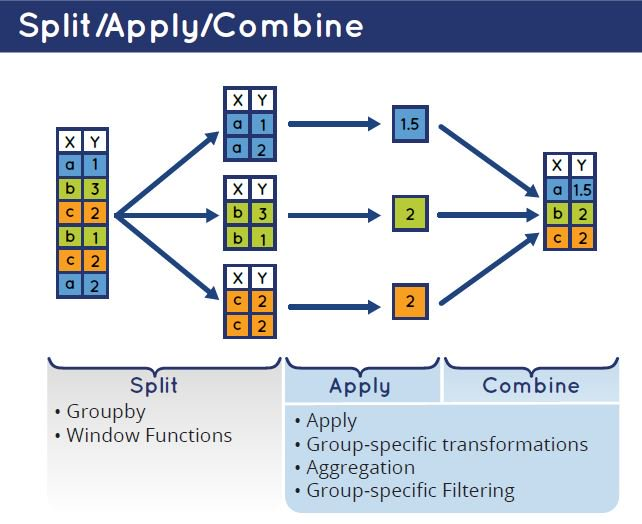

**1) Two columns (X, Y)**

**2) Groups cells by x-column values**

**3) Apply the .dot() method (mean/avg of values)**

In [6]:
world_df.groupby('position')

### For each artist in dataset, what was the longest song that made it to the top 50?

In [7]:
world_df.groupby('artist')

In [8]:
world_df.groupby('artist')['duration_ms'].max().to_frame()

,duration_ms
artist,
Alessandra,147979
Arctic Monkeys,183956
BTS,229953
Bad Bunny,231704
Beyoncé & Kendrick Lamar,260962
...,...
Yahritza Y Su Esencia & Grupo Frontera,160517
Yandel,216148
Yng Lvcas & Peso Pluma,234352


### For each position (1 to 50), which artist was in that rank the maximum number of days?

In [9]:
world_df.groupby('position')['artist'].value_counts().to_frame()

count
position artist                                                
1        Eslabon Armado                                      36
         Bad Bunny                                            2
         Bizarrap & Peso Pluma                                2
         BTS                                                  1
2        Bizarrap & Peso Pluma                               18
...                                                         ...
50       Kali Uchis                                           1
         Eladio Carrion                                       1
         Eden Muñoz & Junior H                                1
         Lil Mabu                                             1
         Natanael Cano & Peso Pluma & Gabito Ballesteros      1

[863 rows x 1 columns]

## 1.2 Introducing MultiIndex in Pandas DataFrames

In [10]:
world_df.index

RangeIndex(start=0, stop=2050, step=1)

In [11]:
world_df_with_rank_counts = world_df.groupby('position')['artist'].value_counts().to_frame()
world_df_with_rank_counts.index

MultiIndex([( 1,                                  'Eslabon Armado'),
            ( 1,                                       'Bad Bunny'),
            ( 1,                           'Bizarrap & Peso Pluma'),
            ( 1,                                             'BTS'),
            ( 2,                           'Bizarrap & Peso Pluma'),
            ( 2,                                       'Bad Bunny'),
            ( 2,                                  'Eslabon Armado'),
            ( 2,                          'Yng Lvcas & Peso Pluma'),
            ( 2,                      'Grupo Frontera & Bad Bunny'),
            ( 3,                                       'Bad Bunny'),
            ...
            (50,                                       'Sam Smith'),
            (50,                                        'Dua Lipa'),
            (50,                       'DENNIS & MC Kevin o Chris'),
            (50,                                        'Coldplay'),
            (50,  

### Approach 1

In [12]:
world_df_with_rank_counts.index.get_level_values('position')
#world_df_with_rank_counts.index.get_level_values(0)

Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
       ...
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
      dtype='int64', name='position', length=863)

In [13]:
world_df_with_rank_counts.index.get_level_values('artist')
# world_df_with_rank_counts.index.get_level_values(1)

Index(['Eslabon Armado', 'Bad Bunny', 'Bizarrap & Peso Pluma', 'BTS',
       'Bizarrap & Peso Pluma', 'Bad Bunny', 'Eslabon Armado',
       'Yng Lvcas & Peso Pluma', 'Grupo Frontera & Bad Bunny', 'Bad Bunny',
       ...
       'Sam Smith', 'Dua Lipa', 'DENNIS & MC Kevin o Chris', 'Coldplay',
       'The Weeknd & Playboi Carti & Madonna', 'Kali Uchis', 'Eladio Carrion',
       'Eden Muñoz & Junior H', 'Lil Mabu',
       'Natanael Cano & Peso Pluma & Gabito Ballesteros'],
      dtype='object', name='artist', length=863)

In [14]:
world_df_with_rank_counts['rank'] = world_df_with_rank_counts.index.get_level_values('position')
world_df_with_rank_counts['artist(s)'] = world_df_with_rank_counts.index.get_level_values('artist')
world_df_with_rank_counts.sample(2)

,,count,rank,artist(s)
position,artist,,,
10,The Weeknd & Playboi Carti & Madonna,1,10,The Weeknd & Playboi Carti & Madonna
29,The Weeknd,4,29,The Weeknd


In [15]:
world_df_with_rank_counts.reset_index(drop = True, inplace = True)

In [16]:
world_df_with_rank_counts

,count,rank,artist(s)
0,36,1,Eslabon Armado
1,2,1,Bad Bunny
2,2,1,Bizarrap & Peso Pluma
3,1,1,BTS
4,18,2,Bizarrap & Peso Pluma
...,...,...,...
858,1,50,Kali Uchis
859,1,50,Eladio Carrion
860,1,50,Eden Muñoz & Junior H
861,1,50,Lil Mabu


In [17]:
world_df_with_rank_counts.rename({'artist': 'count'}, axis = 'columns', inplace = True)

In [18]:
world_df_with_rank_counts

,count,rank,artist(s)
0,36,1,Eslabon Armado
1,2,1,Bad Bunny
2,2,1,Bizarrap & Peso Pluma
3,1,1,BTS
4,18,2,Bizarrap & Peso Pluma
...,...,...,...
858,1,50,Kali Uchis
859,1,50,Eladio Carrion
860,1,50,Eden Muñoz & Junior H
861,1,50,Lil Mabu


### Approach 2

In [19]:
world_df_with_rank_counts = world_df.groupby('position')['artist'].value_counts().to_frame()
world_df_with_rank_counts.sample(2)

,,count
position,artist,
27,Metro Boomin,3
1,Bad Bunny,2


In [20]:
world_df_with_rank_counts.rename({'artist': 'count'}, axis = 'columns', inplace = True)

In [21]:
world_df_with_rank_counts.reset_index(inplace=True)

In [22]:
world_df_with_rank_counts

,position,artist,count
0,1,Eslabon Armado,36
1,1,Bad Bunny,2
2,1,Bizarrap & Peso Pluma,2
3,1,BTS,1
4,2,Bizarrap & Peso Pluma,18
...,...,...,...
858,50,Kali Uchis,1
859,50,Eladio Carrion,1
860,50,Eden Muñoz & Junior H,1
861,50,Lil Mabu,1


In [23]:
world_df_with_rank_counts[world_df_with_rank_counts['position'] == 1]['count'].max()

36

In [24]:
max_count_index = world_df_with_rank_counts[world_df_with_rank_counts['position'] == 1]['count'].idxmax()

In [25]:
world_df_with_rank_counts.loc[max_count_index].to_frame().T

,position,artist,count
0,1,Eslabon Armado,36


### Easier View: For each position (1 to 50), which artist was in that rank the maximum number of days?

In [26]:
list_of_dataframes = []
for position in range(1, 51):
    max_count_index = world_df_with_rank_counts[world_df_with_rank_counts['position'] == position]['count'].idxmax()
    world_df_with_rank_counts.loc[max_count_index].to_frame().T
    list_of_dataframes.append(world_df_with_rank_counts.loc[max_count_index].to_frame().T)

In [27]:
list_of_dataframes[3]

,position,artist,count
14,4,Yng Lvcas & Peso Pluma,15


### pd.concat(list_of_dataframes)
### Combines dataframes together

In [28]:
merged_df = pd.concat(list_of_dataframes)
merged_df

,position,artist,count
0,1,Eslabon Armado,36
4,2,Bizarrap & Peso Pluma,18
9,3,Bad Bunny,20
14,4,Yng Lvcas & Peso Pluma,15
21,5,Grupo Frontera & Bad Bunny,12
28,6,Miley Cyrus,23
35,7,David Kushner,11
46,8,SZA,9
56,9,Harry Styles,15
66,10,Harry Styles,8


### set_index()

In [29]:
merged_df.set_index('position', drop=True, inplace = True)
merged_df

,artist,count
position,,
1,Eslabon Armado,36
2,Bizarrap & Peso Pluma,18
3,Bad Bunny,20
4,Yng Lvcas & Peso Pluma,15
5,Grupo Frontera & Bad Bunny,12
6,Miley Cyrus,23
7,David Kushner,11
8,SZA,9
9,Harry Styles,15


In [30]:
del merged_df['count']
merged_df

,artist
position,
1,Eslabon Armado
2,Bizarrap & Peso Pluma
3,Bad Bunny
4,Yng Lvcas & Peso Pluma
5,Grupo Frontera & Bad Bunny
6,Miley Cyrus
7,David Kushner
8,SZA
9,Harry Styles


### How many times has an artist take a spot between 1 and 50?

**For each artist, how many times have they taken a spot betwen 1 and 50? (both inclusive)**

In [31]:
world_df.sample()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
416,2023-05-26,17,Die For You (with Ariana Grande) - Remix,The Weeknd,88,232857,album,21,2023-03-14,False,https://i.scdn.co/image/ab67616d0000b2738ad8f5...


In [32]:
world_df[['position', 'artist']]

,position,artist
0,1,Eslabon Armado
1,2,Grupo Frontera & Bad Bunny
2,3,Yng Lvcas & Peso Pluma
3,4,FIFTY FIFTY
4,5,Miley Cyrus
...,...,...
2045,46,Tom Odell
2046,47,The Weeknd & Playboi Carti & Madonna
2047,48,Nicki Minaj & Ice Spice & Aqua
2048,49,Glass Animals


In [33]:
rank_count_df = world_df.groupby('artist')['position'].value_counts().to_frame()
rank_count_df

count
artist         position       
Alessandra     47            1
               42            1
Arctic Monkeys 25            6
               29            5
               20            4
...                        ...
d4vd           41            1
               40            1
               39            1
               31            1
               30            1

[863 rows x 1 columns]

In [34]:
rank_count_df.rename({'count': 'number of times'}, axis = 'columns', inplace=True)

In [35]:
rank_count_df.reset_index(inplace=True)
rank_count_df

,artist,position,number of times
0,Alessandra,47,1
1,Alessandra,42,1
2,Arctic Monkeys,25,6
3,Arctic Monkeys,29,5
4,Arctic Monkeys,20,4
...,...,...,...
858,d4vd,41,1
859,d4vd,40,1
860,d4vd,39,1
861,d4vd,31,1


In [52]:
top_50_count_for_each_artist = rank_count_df.groupby('artist')['number of times'].sum().to_frame()

In [53]:
top_50_count_for_each_artist.sort_values(by = 'number of times', ascending = False)

,number of times
artist,
The Weeknd,123
Taylor Swift,112
Metro Boomin,105
Miley Cyrus,82
Grupo Frontera & Bad Bunny,41
...,...
David Guetta & Anne-Marie & Coi Leray,1
Fast & Furious: The Fast Saga,1
Bizarrap & Quevedo,1


## 1.3 Joins
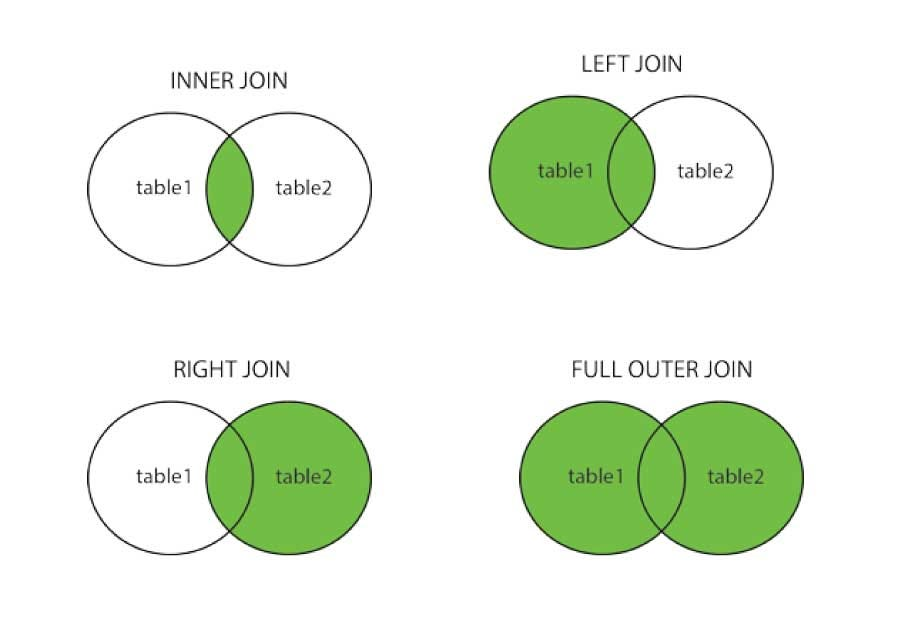

In [38]:
world_info = world_df[['date', 'position', 'artist', 'song']]
world_info.sample(3)

,date,position,artist,song
1444,2023-06-15,45,Lil Durk,All My Life (feat. J. Cole)
548,2023-05-28,49,Bizarrap & Shakira,"Shakira: Bzrp Music Sessions, Vol. 53"
770,2023-06-02,21,Lil Durk,All My Life (feat. J. Cole)


In [39]:
world_info.shape

(2050, 4)

In [40]:
world_df['position'] = world_df['position'].astype('int')

In [41]:
usa_info = usa_df[['date', 'position', 'artist', 'song']]
usa_info.sample(3)

,date,position,artist,song
419,2023-05-26,20,David Kushner,Daylight
2038,2023-06-27,39,Peso Pluma,BYE
838,2023-06-03,39,Rema,Calm Down (with Selena Gomez)


In [42]:
usa_info.shape

(2050, 4)

In [43]:
usa_df['position'] = usa_df['position'].astype('int')

### 1.3.1 Inner Join

In [44]:
world_info.merge(right = usa_info, on=['date', 'artist', 'song'], how='inner')
# default is inner

,date,position_x,artist,song,position_y
0,2023-05-18,1,Eslabon Armado,Ella Baila Sola,1
1,2023-05-18,2,Grupo Frontera & Bad Bunny,un x100to,4
2,2023-05-18,3,Yng Lvcas & Peso Pluma,La Bebe - Remix,8
3,2023-05-18,4,FIFTY FIFTY,Cupid - Twin Ver.,7
4,2023-05-18,5,Miley Cyrus,Flowers,14
...,...,...,...,...,...
1111,2023-06-27,29,Taylor Swift,Anti-Hero,33
1112,2023-06-27,30,"Tyler, The Creator",See You Again (feat. Kali Uchis),10
1113,2023-06-27,31,Metro Boomin,Calling (Spider-Man: Across the Spider-Verse) ...,21
1114,2023-06-27,45,Peso Pluma & Natanael Cano,PRC,42


In [45]:
world_info.merge(right = usa_info, on=['date', 'artist', 'song'], how='inner', suffixes = ['_world', '_usa'])
# suffixes renames headers

,date,position_world,artist,song,position_usa
0,2023-05-18,1,Eslabon Armado,Ella Baila Sola,1
1,2023-05-18,2,Grupo Frontera & Bad Bunny,un x100to,4
2,2023-05-18,3,Yng Lvcas & Peso Pluma,La Bebe - Remix,8
3,2023-05-18,4,FIFTY FIFTY,Cupid - Twin Ver.,7
4,2023-05-18,5,Miley Cyrus,Flowers,14
...,...,...,...,...,...
1111,2023-06-27,29,Taylor Swift,Anti-Hero,33
1112,2023-06-27,30,"Tyler, The Creator",See You Again (feat. Kali Uchis),10
1113,2023-06-27,31,Metro Boomin,Calling (Spider-Man: Across the Spider-Verse) ...,21
1114,2023-06-27,45,Peso Pluma & Natanael Cano,PRC,42


#### On a given date, a particular artist was on **BOTH** Global and USA Spotify Top 50. 
#### position_world = Global spotify position
#### position_usa = spotify top 50 US position.

### 1.3.2 Outer Join

In [46]:
world_info.merge(right = usa_info, on=['date', 'artist', 'song'], how='outer', suffixes = ['_world', '_usa'])

,date,position_world,artist,song,position_usa
0,2023-05-18,1.0,Eslabon Armado,Ella Baila Sola,1.0
1,2023-05-18,2.0,Grupo Frontera & Bad Bunny,un x100to,4.0
2,2023-05-18,3.0,Yng Lvcas & Peso Pluma,La Bebe - Remix,8.0
3,2023-05-18,4.0,FIFTY FIFTY,Cupid - Twin Ver.,7.0
4,2023-05-18,5.0,Miley Cyrus,Flowers,14.0
...,...,...,...,...,...
2979,2023-06-27,NaN,Chino Pacas,El Gordo Trae El Mando,45.0
2980,2023-06-27,NaN,Kali Uchis,Moonlight,46.0
2981,2023-06-27,NaN,Lyrical Lemonade & Juice WRLD & Cordae,Doomsday (with Juice WRLD & Cordae),47.0
2982,2023-06-27,NaN,Lil Durk,Stand By Me (feat. Morgan Wallen),49.0


#### On a given date, a particular artist was on **EITHER** Global and USA Spotify Top 50. 
#### position_world = Global spotify position 
#### position_usa = spotify top 50 US position.

### 1.3.3 Left Join

In [47]:
world_info.merge(right = usa_info, on=['date', 'artist', 'song'], how='left', suffixes = ['_world', '_usa'])

,date,position_world,artist,song,position_usa
0,2023-05-18,1,Eslabon Armado,Ella Baila Sola,1.0
1,2023-05-18,2,Grupo Frontera & Bad Bunny,un x100to,4.0
2,2023-05-18,3,Yng Lvcas & Peso Pluma,La Bebe - Remix,8.0
3,2023-05-18,4,FIFTY FIFTY,Cupid - Twin Ver.,7.0
4,2023-05-18,5,Miley Cyrus,Flowers,14.0
...,...,...,...,...,...
2045,2023-06-27,46,Tom Odell,Another Love,NaN
2046,2023-06-27,47,The Weeknd & Playboi Carti & Madonna,Popular (with Playboi Carti & Madonna) - The I...,NaN
2047,2023-06-27,48,Nicki Minaj & Ice Spice & Aqua,Barbie World (with Aqua) [From Barbie The Album],9.0
2048,2023-06-27,49,Glass Animals,Heat Waves,NaN


#### On a given date, a particular artist was on **Global Spotify Top 50**. If the same artist for the same song, on the same date, was also on USA top 50, their rank is given in position_usa. If not in USA top 50, position_usa will be NaN (Not a Number).
#### position_world = Global spotify position
#### position_usa = spotify top 50 US position.

### 1.3.4 Right Join

In [48]:
world_info.merge(right = usa_info, on=['date', 'artist', 'song'], how='right', suffixes = ['_world', '_usa'])

,date,position_world,artist,song,position_usa
0,2023-05-18,1.0,Eslabon Armado,Ella Baila Sola,1
1,2023-05-18,27.0,Morgan Wallen,Last Night,2
2,2023-05-18,26.0,Lil Durk & J. Cole,All My Life (feat. J. Cole),3
3,2023-05-18,2.0,Grupo Frontera & Bad Bunny,un x100to,4
4,2023-05-18,7.0,SZA,Kill Bill,5
...,...,...,...,...,...
2045,2023-06-27,NaN,Kali Uchis,Moonlight,46
2046,2023-06-27,NaN,Lyrical Lemonade & Juice WRLD & Cordae,Doomsday (with Juice WRLD & Cordae),47
2047,2023-06-27,21.0,Rema,Calm Down (with Selena Gomez),48
2048,2023-06-27,NaN,Lil Durk,Stand By Me (feat. Morgan Wallen),49


#### On a given date, a particular artist was on **USA Spotify Top 50**. If the same artist for the same song, on the same date, was also on Global top 50, their rank is given in position_world. If not in Global top 50, position_world will be NaN (Not a Number).
#### position_world = Global spotify position
#### position_usa = spotify top 50 US position.

### 1.3.5 Cross ie. Cartesian Product (Cross Product)

In [49]:
left = pd.DataFrame({'col1': [1,2], 'col2': [3,4]})
left

,col1,col2
0,1,3
1,2,4


In [50]:
right = pd.DataFrame({'col1': [5,6]})
right

,col1
0,5
1,6


In [51]:
left.merge(right, how='cross')

,col1_x,col2,col1_y
0,1,3,5
1,1,3,6
2,2,4,5
3,2,4,6
